# Task 1 : Prediction using Supervised ML


In this task we are given some data which we will be using to predict the marks a student will score based upon the number of hours they studied. This is a simple linear regression problem as it involves just two variables.

**Author : Saikumar**

In [2]:
#importing all the necessary libraries required.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Now import the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Succesfully imported")
data

Succesfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data visualization

Now let's have a look at how the data looks on a 2D plot.

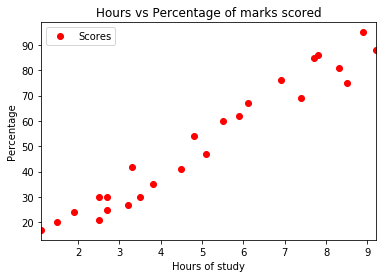

In [44]:
#plotting the data
data.plot(x="Hours",y="Scores",c="r",style="o")
plt.title("Hours vs Percentage of marks scored")
plt.xlabel("Hours of study")
plt.ylabel("Percentage")
plt.show()

# Linear Regression Model

Now we allocate the variables x and y as hours studied and percentage of marks scored respectively.

In [29]:
#Splitting training and test set data
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

print("data alloction succesfull")

data alloction succesfull


In [30]:
print("Shape of X : ",X.shape)
print("Shape of Y : ",Y.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of Y_test  : ",Y_test.shape)

Shape of X :  (25, 1)
Shape of Y :  (25,)
Shape of X_test :  (5, 1)
Shape of Y_test  :  (5,)


# Training the Model

In [31]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print("Training complete")

Training complete


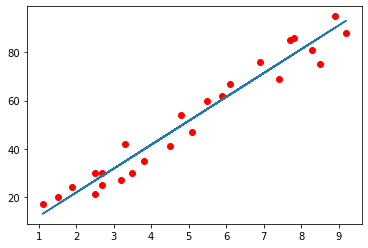

In [32]:
#plotting the line predicted by our algorithm
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y,c="r",marker="o")
plt.plot(X,line)
plt.show()

# Predictions

In [33]:
#predicting the scores for testing set data
Y_pred=regressor.predict(X_test)

In [34]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing predicted values with actual ones.

In [35]:
df = pd.DataFrame({"Actualvalues":Y_test,"Predictions":Y_pred})
df

,Actualvalues,Predictions
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Plotting a Line chart comparing Actual and predicted values

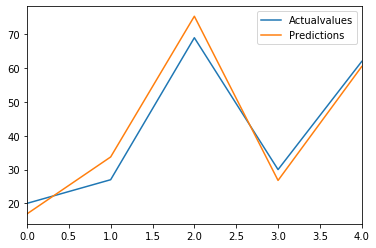

In [36]:
df.Actualvalues.plot()
df.Predictions.plot()
plt.legend()

# Computing accuracy scores for training and test sets

In [37]:
print("Training score : ",regressor.score(X_train,Y_train))
print("Test set score : " ,regressor.score(X_test,Y_test))

Training score :  0.9515510725211553
Test set score :  0.9454906892105354


# Evaluation

In [38]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982


# Results

Predicting marks of student who studies for 9.25hrs a day.

In [39]:
#Let's predict the score for 9.25 hpurs
print("Score of student who studied for 9.25 hours a day : ", regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day :  [93.69173249]


Input some value for number of hours to predict the marks of student.

In [41]:
X_input=float(input("Enter number of hours for predicting percentage marks of student : "))
print('Predicted Score{}'.format(regressor.predict([[X_input]])))

Enter number of hours for predicting percentage marks of student :  10


Predicted Score[101.12472485]


Here if we predict the marks of a student who studied for more than around 10hrs a day the predicted score crosses 100 since this is linear regression and our predicted values are in a straight line that never ends.

**With this Simple Linear Regression Model we got an accuracy of 94.55%, which is pretty good.**